In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./train.csv')
raw_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
raw_data.groupby('location').agg({'target':['count','sum']})[('target','sum')].nlargest(10) #Top ten ubicaciones con mas tweets verdaderos

location
USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
London            16
New York          16
UK                16
Washington, DC    15
Canada            13
Name: (target, sum), dtype: int64

In [4]:
data_grouped_location = raw_data.groupby('location').agg({'target':['count','sum']})
data_grouped_location.columns = ['target_count','target_sum']
data_grouped_location.sort_values(by='target_sum',ascending=False)

,target_count,target_sum
location,,
USA,104,67
United States,50,27
Nigeria,28,22
India,24,20
Mumbai,22,19
...,...,...
"Not where I want to be, yet",1,0
Not Steven Yeun / AMC.,1,0
"Clearwater, FL",1,0


In [5]:
droped = data_grouped_location.drop(data_grouped_location[data_grouped_location['target_count'] < 10].index)
droped['target_count'].nsmallest(10)

location
Atlanta, GA          10
London, England      10
London, UK           10
New York City        10
Sacramento, CA       10
Texas                10
ss                   10
Chicago              11
Earth                11
San Francisco, CA    11
Name: target_count, dtype: int64

In [6]:
droped['truth_percentage'] = (droped['target_sum']*100) / droped['target_count']
droped.head()
droped_sorted = droped.sort_values(by='truth_percentage',ascending=False)

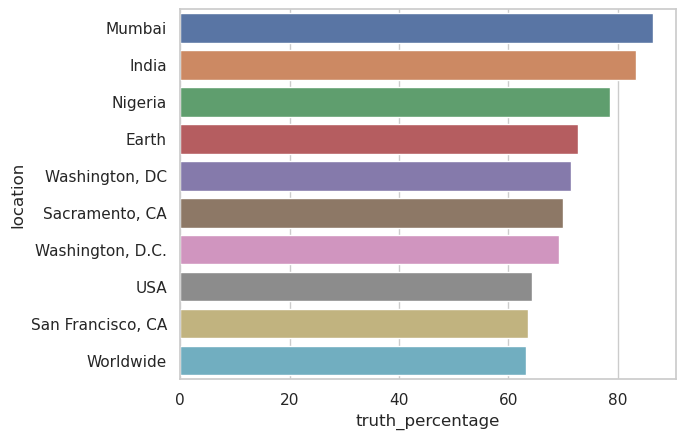

In [7]:
g = sns.barplot(x=droped_sorted['truth_percentage'].nlargest(10),y=droped_sorted['truth_percentage'].nlargest(10).index,orient='h')

In [31]:
#Getting the data for location-keyword relationshp analysis
twitterKeywordAndLocation = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv',\
                                        usecols = ['keyword', 'location'])
twitterKeywordAndLocation = twitterKeywordAndLocation[twitterKeywordAndLocation['keyword'] != 'unknown']
twitterKeywordAndLocation = twitterKeywordAndLocation[twitterKeywordAndLocation['location'] != 'unknown']
twitterKeywordAndLocation.head()

,keyword,location
0,earthquake,us
1,fire,la
3,evacuation,california
4,smoke,alaska
5,fire,california


In [9]:
#Some of DataFrame's properties
twitterKeywordAndLocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
dtypes: object(2)
memory usage: 119.1+ KB


In [10]:
twitterKeywordAndLocation.count()

keyword     7552
location    5080
dtype: int64

In [11]:
#Changing DataFrmae columns data types in order to apply some operations on them 

twitterKeywordAndLocation['keyword'] = twitterKeywordAndLocation['keyword'].astype('string')
twitterKeywordAndLocation['location'] = twitterKeywordAndLocation['location'].astype('string')

In [12]:
#Cleaning the data

#Dropping null values
twitterKeywordAndLocation.dropna(inplace = True)
twitterKeywordAndLocation.count()

keyword     5080
location    5080
dtype: int64

In [13]:
#We consider that those locations containing non-alphanumerical characters are not real
#Dropping false locations
twitterKeywordAndLocation = twitterKeywordAndLocation[~twitterKeywordAndLocation['location'].str.isalnum()]
twitterKeywordAndLocation

,keyword,location
32,ablaze,Est. September 2012 - Bristol
34,ablaze,"Philadelphia, PA"
35,ablaze,"London, UK"
37,ablaze,World Wide!!
39,ablaze,Paranaque City
...,...,...
7572,wrecked,"Manhattan, NY"
7573,wrecked,"Denton, Texas"
7577,wrecked,#NewcastleuponTyne #UK
7579,wrecked,"Vancouver, Canada"


In [14]:
#Dropping those locations that don't have a significant amount of keywords
#For that, first we see the average
twitterKeywordAndLocation['location'].value_counts().mean()

1.340524991010428

In [15]:
#Then, we filter
twitterKeywordAndLocation = twitterKeywordAndLocation.groupby('location').filter(lambda x: len(x) > 4)
twitterKeywordAndLocation.count()

keyword     596
location    596
dtype: int64

In [16]:
#Visualization

#Counter of keywords
twitterKeywordAndLocation['counter'] = 1
twitterKeywordAndLocation

,keyword,location,counter
35,ablaze,"London, UK",1
56,ablaze,South Africa,1
64,ablaze,"Calgary, AB",1
66,ablaze,San Francisco,1
68,accident,"Nashville, TN",1
...,...,...,...
7496,wreck,United States,1
7523,wreckage,Southern California,1
7544,wrecked,"Brooklyn, NY",1
7547,wrecked,United States,1


In [17]:
#Amount of keywords per location
keywordsPerLocation = twitterKeywordAndLocation.groupby('location').agg({'counter' : 'sum'}).sort_values(by = 'counter', ascending = False)
keywordsPerLocation

,counter
location,
New York,71
United States,50
"Los Angeles, CA",26
"Washington, DC",21
"Chicago, IL",18
...,...
"Cleveland, OH",5
"Calgary, AB",5
"Boston, MA",5


Text(0.5, 0, 'Location')

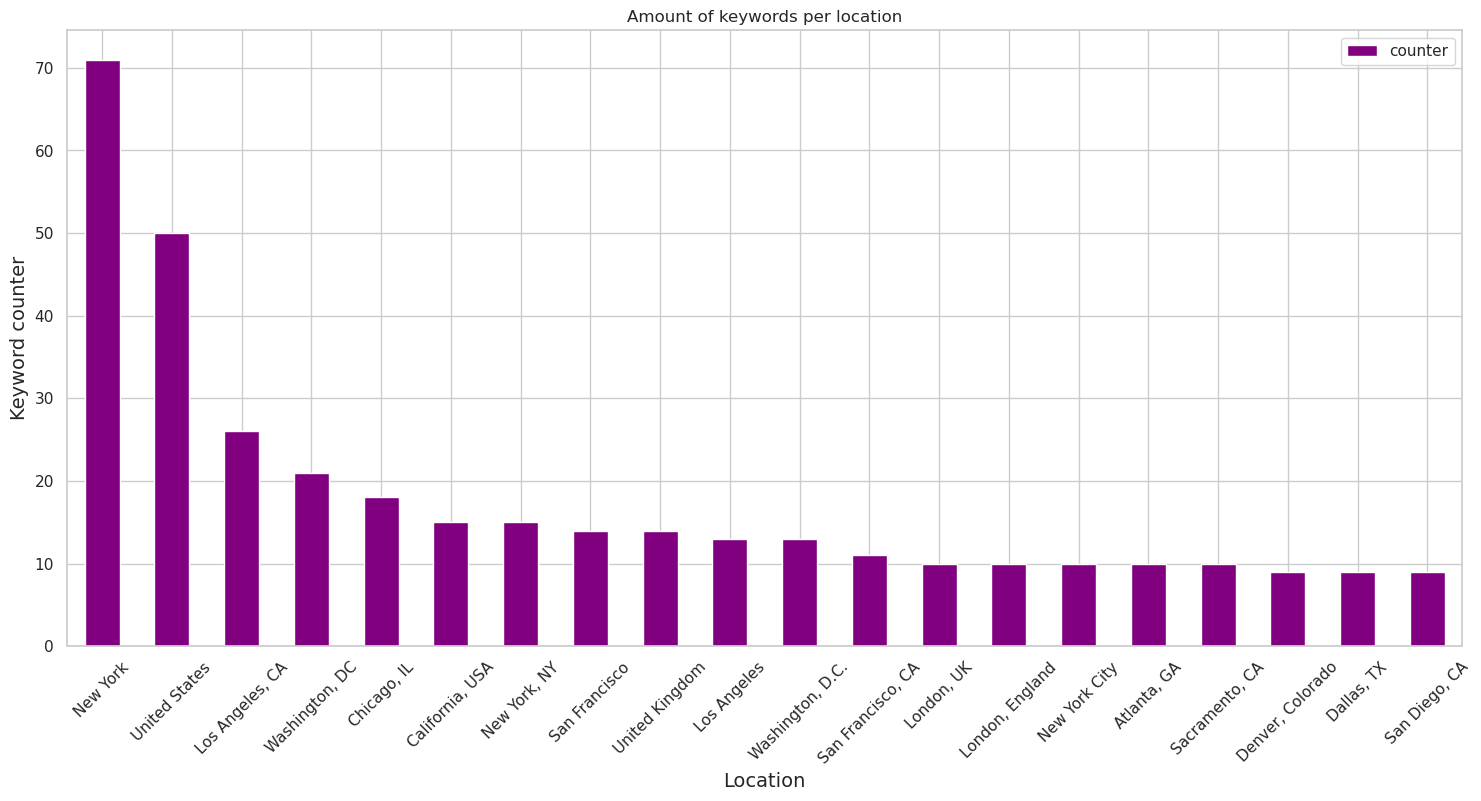

In [18]:
#barplot

ax = keywordsPerLocation.head(20).plot(kind = 'bar', figsize = (18, 8), rot = 45,\
                                   title = 'Amount of keywords per location',\
                                  color = 'purple')
ax.set_ylabel('Keyword counter', size = 14)
ax.set_xlabel('Location', size = 14)

In [19]:
#Most popular keywords
keywordsPopular = twitterKeywordAndLocation.groupby('keyword').agg({'counter' : 'sum'}).sort_values(by = 'counter', ascending = False)
keywordsPopular.mean()

counter                   3.10
dtype: float64

In [20]:
keywordsPopular = keywordsPopular[keywordsPopular['counter'] > 1]
keywordsPopular.head()

,counter
keyword,
flood,16
body%20bag,12
derail,11
displaced,11
catastrophic,9


Text(0.5, 0, 'Keyword')

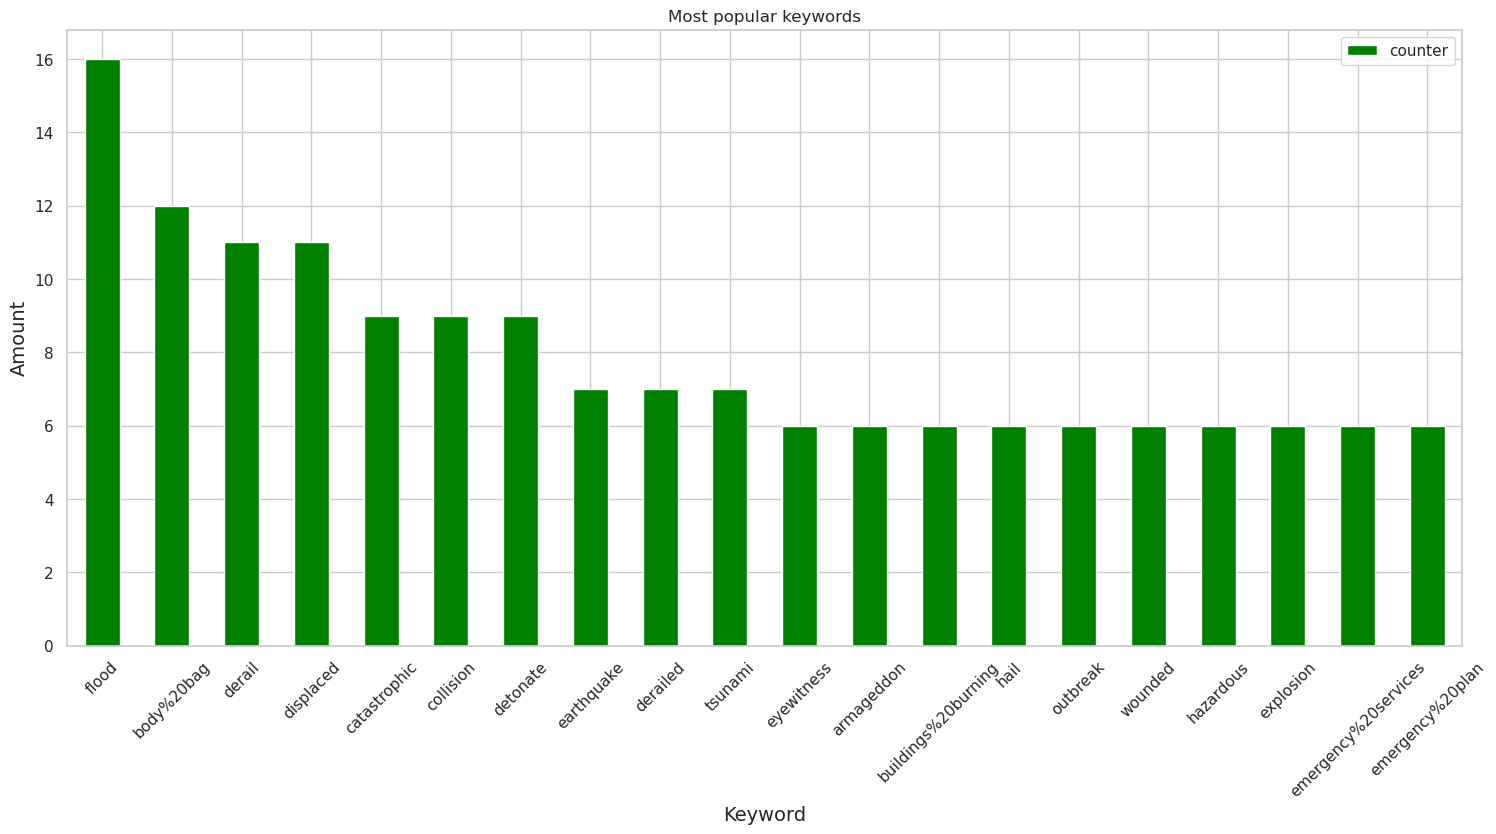

In [21]:
#barplot

ax = keywordsPopular.head(20).plot(kind = 'bar', figsize = (18, 8), rot = 45,\
                                   title = 'Most popular keywords',\
                                  color = 'green')
ax.set_ylabel('Amount', size = 14)
ax.set_xlabel('Keyword', size = 14)

In [22]:
#Comparison between locations with most keywords and most popular keywords
locationAndKeyword = twitterKeywordAndLocation
locationAndKeyword = pd.merge(locationAndKeyword, keywordsPopular, on = 'keyword')
locationAndKeyword['counter'] = locationAndKeyword['counter_x'] + locationAndKeyword['counter_y']
locationAndKeyword = locationAndKeyword.drop(['counter_x', 'counter_y'], axis = 1)
locationAndKeyword.fillna(0)
locationAndKeyword = locationAndKeyword.head(40)

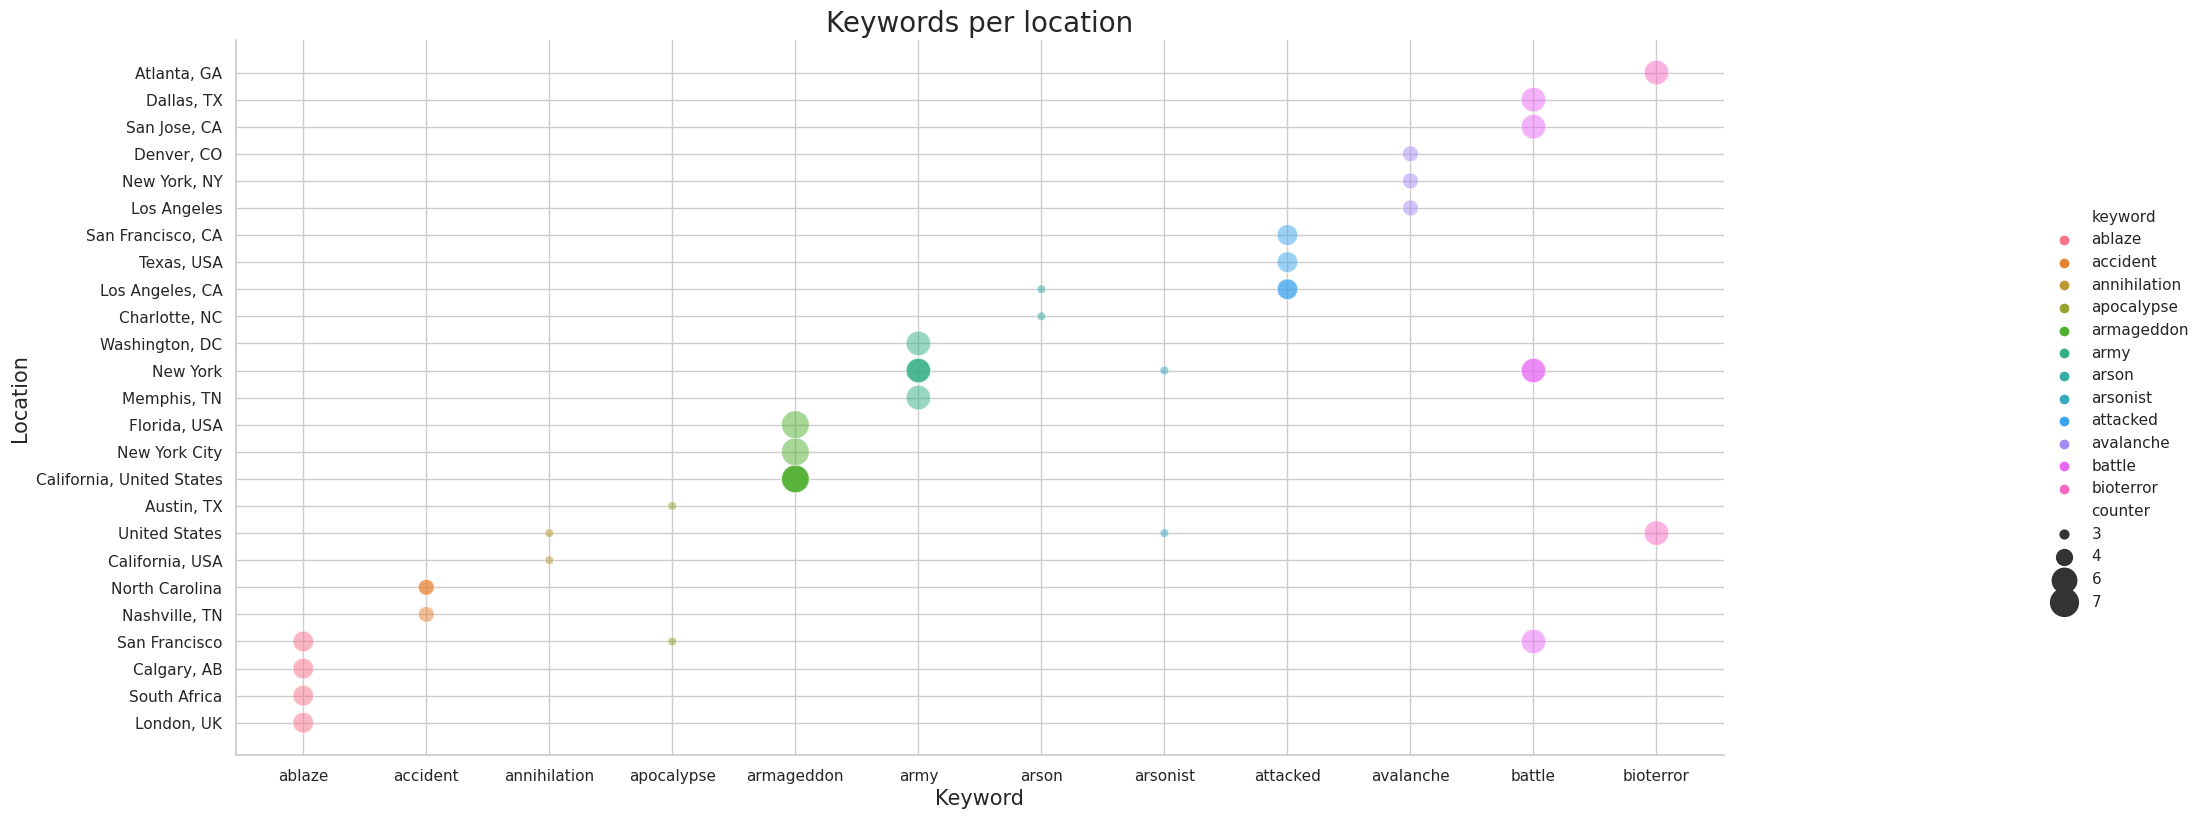

In [23]:
#scatterplot

g = sns.relplot(x = 'keyword', y = 'location', hue = 'keyword', size = 'counter',\
            sizes = (40, 400), alpha = .5, height = 8, data = locationAndKeyword)
g.ax.set_title('Keywords per location', fontsize = 20)
g.set_xlabels('Keyword',fontsize = 15)
g.set_ylabels('Location', fontsize = 15)
g.ax.figure.set_size_inches(28, 8)

In [24]:
#Starting the analisis for the relation between keywords and hashtags
hashForKeywordsAndHashtags = {}
csvFormatted = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['keyword', 'text', 'target'])
csvFormatted = csvFormatted[csvFormatted['keyword'] != 'unknown']
csvFormatted['keyword'].value_counts().head(20)

fatalities    45
deluge        42
earthquake    42
armageddon    42
damage        42
collided      41
flooding      41
fire          41
sinking       41
harm          41
evacuate      41
body bags     41
windstorm     40
fear          40
siren         40
evacuation    40
outbreak      40
twister       40
wreckage      39
typhoon       39
Name: keyword, dtype: int64

In [25]:
def sumHashtagIfNedeed(line, keyword, hashOfKeywords):
    for word in line.split():
        if not word.startswith('#'):
            continue
        word = word.lower().lstrip('#')
        if keyword not in hashOfKeywords:
            hashOfKeywords[keyword] = {}
        hashOfKeywords[keyword][word.lstrip('#')] = hashOfKeywords[keyword].get(word.lstrip('#'), 0) + 1

In [26]:
for index, row in csvFormatted.iterrows():
    sumHashtagIfNedeed(row['text'], row['keyword'], hashForKeywordsAndHashtags)

In [27]:
d = {'keyword': [], 'amount': []}
for key in hashForKeywordsAndHashtags:
    d['keyword'].append(key)
    d['amount'].append(sum(hashForKeywordsAndHashtags[key].values()))
keywordDf = pd.DataFrame(d, columns =['keyword', 'amount'])
keywordDf = keywordDf[keywordDf['amount'] > 15].sort_values(by = ['amount'])
keywordDf

,keyword,amount
73,demolition,16
71,demolish,16
148,obliterate,16
56,collided,16
55,collide,16
...,...,...
9,aftershock,51
127,hijacking,54
15,armageddon,57
190,terrorism,78


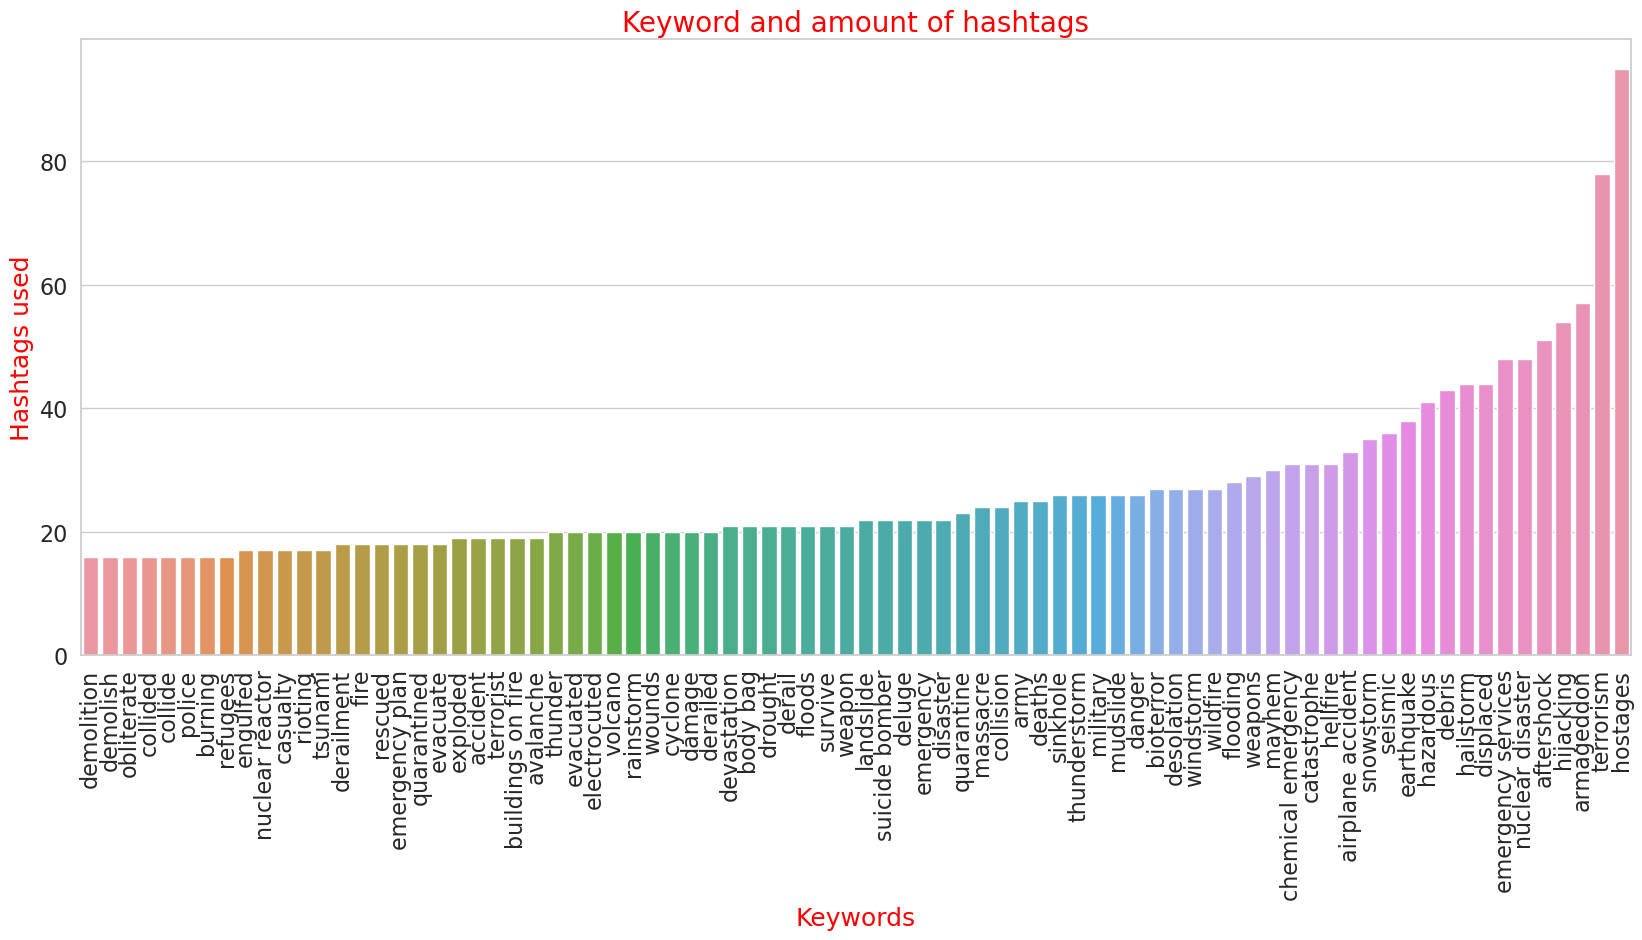

In [28]:
ax = sns.barplot(x = 'keyword', y = 'amount', data = keywordDf);
ax.set_title('Keyword and amount of hashtags', fontsize=20, color = 'red')
ax.set_xlabel('Keywords', fontsize = 18, color = 'red')
ax.set_ylabel('Hashtags used', fontsize = 18, color ='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.figure.set_size_inches(20, 8);
plt.show()

In [29]:
csvWithOnlyKeywordTarget = csvFormatted.drop('text', 1)
csvWithOnlyKeywordTarget = csvWithOnlyKeywordTarget.groupby(['keyword']).agg({'target': ['mean', 'count']})
csvWithOnlyKeywordTarget.columns = csvWithOnlyKeywordTarget.columns.get_level_values(0) + '_' + csvWithOnlyKeywordTarget.columns.get_level_values(1)
csvWithOnlyKeywordTarget = csvWithOnlyKeywordTarget.sort_values(by = ['target_mean']).reset_index() #Hasta aca tengo TODOS los valores de verdad
csvWithOnlyKeywordTarget = pd.merge(csvWithOnlyKeywordTarget, keywordDf, on='keyword', how='inner')
csvWithOnlyKeywordTarget.head(20)

,keyword,target_mean,target_count,amount
0,aftershock,0.00,34,51
1,body bag,0.03,33,21
2,collide,0.09,34,16
3,mayhem,0.10,30,30
4,armageddon,0.12,42,57
5,obliterate,0.13,31,16
6,avalanche,0.13,30,19
7,deluge,0.14,42,22
8,demolish,0.15,34,16
9,survive,0.16,32,21


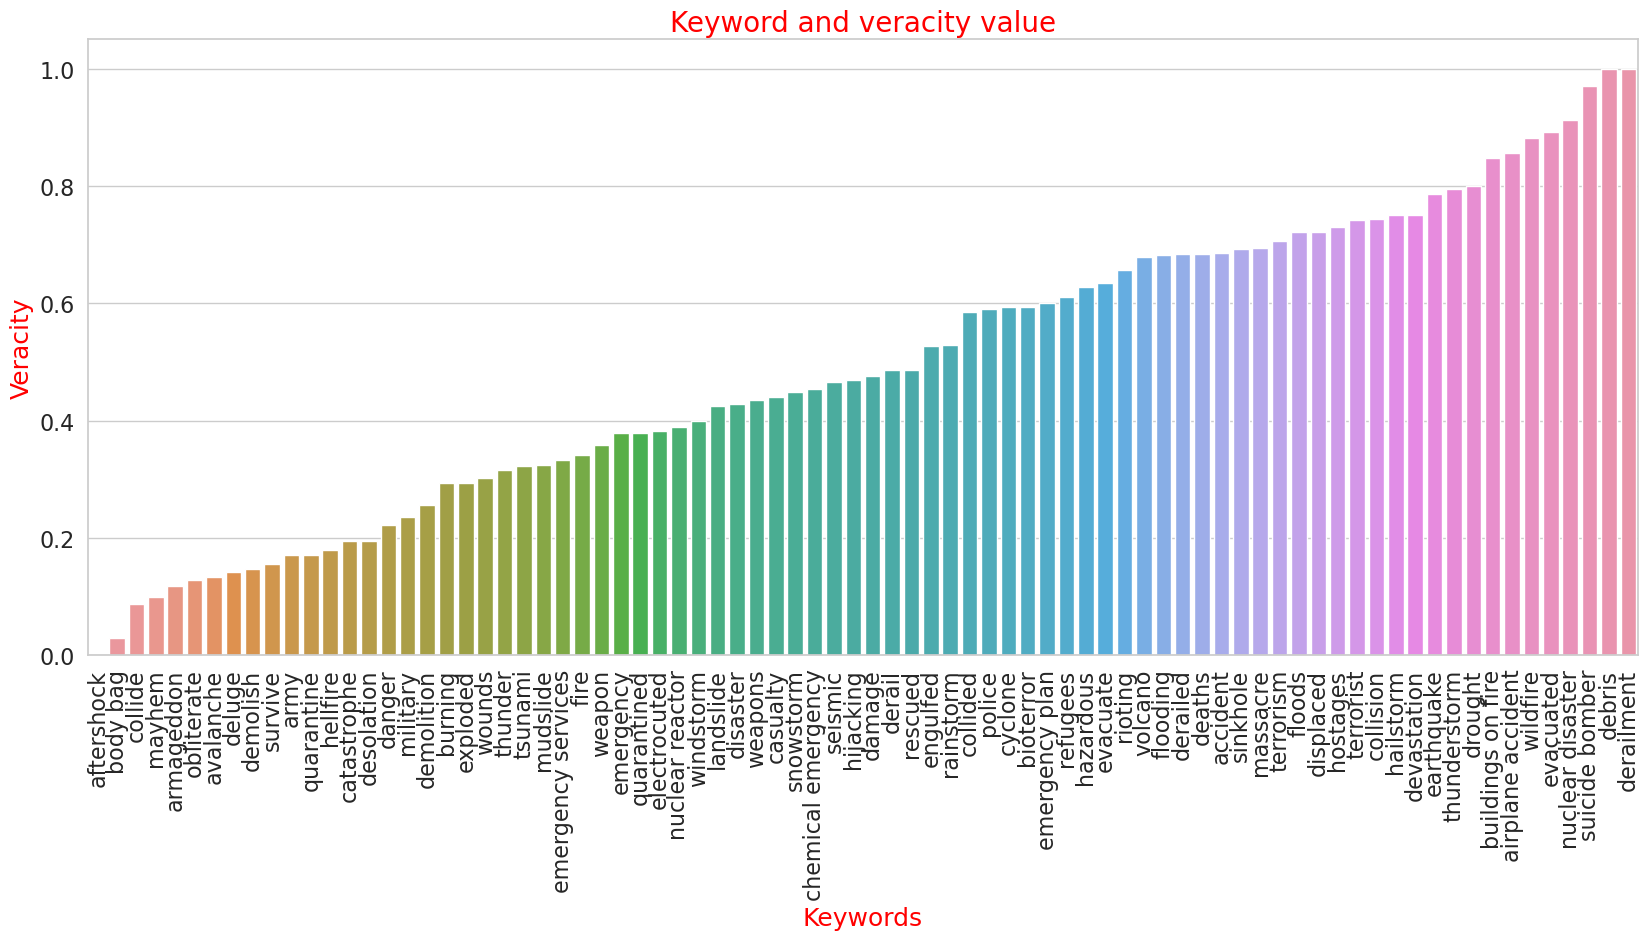

In [30]:
ax = sns.barplot(x = 'keyword', y = 'target_mean', data = csvWithOnlyKeywordTarget);
ax.set_title('Keyword and veracity value', fontsize=20, color = 'red')
ax.set_xlabel('Keywords', fontsize = 18, color = 'red')
ax.set_ylabel('Veracity', fontsize = 18, color ='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.figure.set_size_inches(20, 8);
plt.show()

In [ ]:
#Analysis of kind of hashtags used in tweets based on tweet's veracity

In [101]:
tweetsInfo = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['text', 'target'])
tweetsInfo.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [97]:
#Gets the hashtag
def hashtagGetter(text, char):
    pos = text.find(char)
    text = text[pos:]
    #Some hashtags finish with : or .
    if text.endswith(':') or text.endswith('.'):
        text = text[:-1]
    return text

In [98]:
#Returns True if the hashtag is valid, false otherwise
#A hashtag is valid if it only contains alphanumeric values
def hashtagIsValid(hashtag, char):
    if char in hashtag:
        hashtag = hashtagGetter(hashtag, char)
        hashtag = hashtag[1:]
        return hashtag.isalnum()
    return False

In [99]:
#Receives a text
#Returns a list containing all valid hashtags on the text
#A hashtag is valid if it only contains alphanumeric values
def getValidHashtags(text, char):
    resultingHashtags = []
    text = text.split()
    for word in text:
        hashtag = hashtagGetter(word, char)
        if hashtagIsValid(hashtag, char) == True:
                resultingHashtags.append(hashtag)
    return resultingHashtags

In [74]:
def getAmountOfHashtags(text, char):
    return len(getValidHashtags(text, char))

In [102]:
tweetsInfo['hashtag'] = tweetsInfo['text'].apply(getAmountOfHashtags, args = ('#'))
tweetsInfo = tweetsInfo[tweetsInfo['hashtag'] > 0]
del tweetsInfo['hashtag']
tweetsInfo.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,1


In [86]:
#This function creates a new DF containing each hashtag, their occurrences
#And the amount of targets realted to the tweets cointaining that hashtag
#text its a combination of two columns, text and target, the target is in the last position always
def hashtagDFMaker(text, dicc, char):
    text = text.split()
    target = int(text[-1])
    for word in text:
        if char in word:
            hashtag = hashtagGetter(word, char)  #auxString could be a @user or a #hashtag
            if hashtagIsValid(hashtag, char):
                hashtag = hashtag.lower()
                auxList = dicc[hashtag] = dicc.get(hashtag, [0,0])
                auxList[0] += 1
                auxList[1] += target

In [83]:
#textCol: must be of type str
#targetCol: its type will be transform into str
#dataframe where columns are
#return a Serie with the combination of text and target
def colsCombination(textCol, targetCol, dataframe):
        strText = dataframe[textCol]
        strTarget = dataframe[targetCol]
        strTarget = strTarget.astype(str)
        return strText + ' ' + strTarget

In [87]:
hashtagsDicc = {}
tweetsInfoHashtags = colsCombination('text','target', tweetsInfo)
tweetsInfoHashtags.apply(hashtagDFMaker, args = (hashtagsDicc,'#'))

0       None
3       None
4       None
5       None
6       None
        ... 
7598    None
7599    None
7601    None
7604    None
7607    None
Length: 1697, dtype: object

In [89]:
def getInfo(dataList, pos):
    return dataList[pos]

In [112]:
hashtagsSerie = pd.Series(hashtagsDicc)
hashtagsDataFrame = hashtagsSerie.to_frame(name = 'auxCol')
hashtagsDataFrame['occurrence'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(0,))
hashtagsDataFrame['target_sum'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(1,))
del hashtagsDataFrame['auxCol']
hashtagsDataFrame.head()

,occurrence,target_sum
#earthquake,19,19
#wildfires,5,5
#alaska,2,1
#rockyfire,4,4
#cafire,2,2


In [ ]:
#Analysis of kind of hashtags based on tweet's veracity

In [113]:
hashtagsDataFrame = hashtagsDataFrame.reset_index()
hashtagsDataFrame = hashtagsDataFrame.rename(columns = {'index' : 'hashtag'})
hashtagsDataFrame.head()

,hashtag,occurrence,target_sum
0,#earthquake,19,19
1,#wildfires,5,5
2,#alaska,2,1
3,#rockyfire,4,4
4,#cafire,2,2


In [120]:
textPerVeracity = tweetsInfo.groupby('target').agg({'text' : 'sum'})

In [121]:
#Returns a DF with hashtags included in tweets of veracity 'target', their occurrence and target_sum
#target = 0 -> false tweets
#target = 1 -> real tweets
def hashtagPerVeracityDFMaker(target, char):
    df = pd.DataFrame()
    df['hashtag'] = getValidHashtags(textPerVeracity.loc[target,'text'], char)
    df = hashtagsDataFrame.merge(df, on = 'hashtag')
    df = df.drop_duplicates()
    return df

In [118]:
#Creating DF with hashtags and the veracity of the tweets containing them
#Hashtags in false tweets:
DFHashtagPerFalseTweets = hashtagPerVeracityDFMaker(0, '#')
DFHashtagPerFalseTweets['occurrence'] = DFHashtagPerFalseTweets['occurrence'] - DFHashtagPerFalseTweets['target_sum']
del DFHashtagPerFalseTweets['target_sum']
DFHashtagPerFalseTweets = DFHashtagPerFalseTweets.sort_values(by = 'occurrence',\
                                                             ascending = False)
DFHashtagPerFalseTweets.head(3)

,hashtag,occurrence
5,#nowplaying,21
18,#news,20
331,#prebreak,17


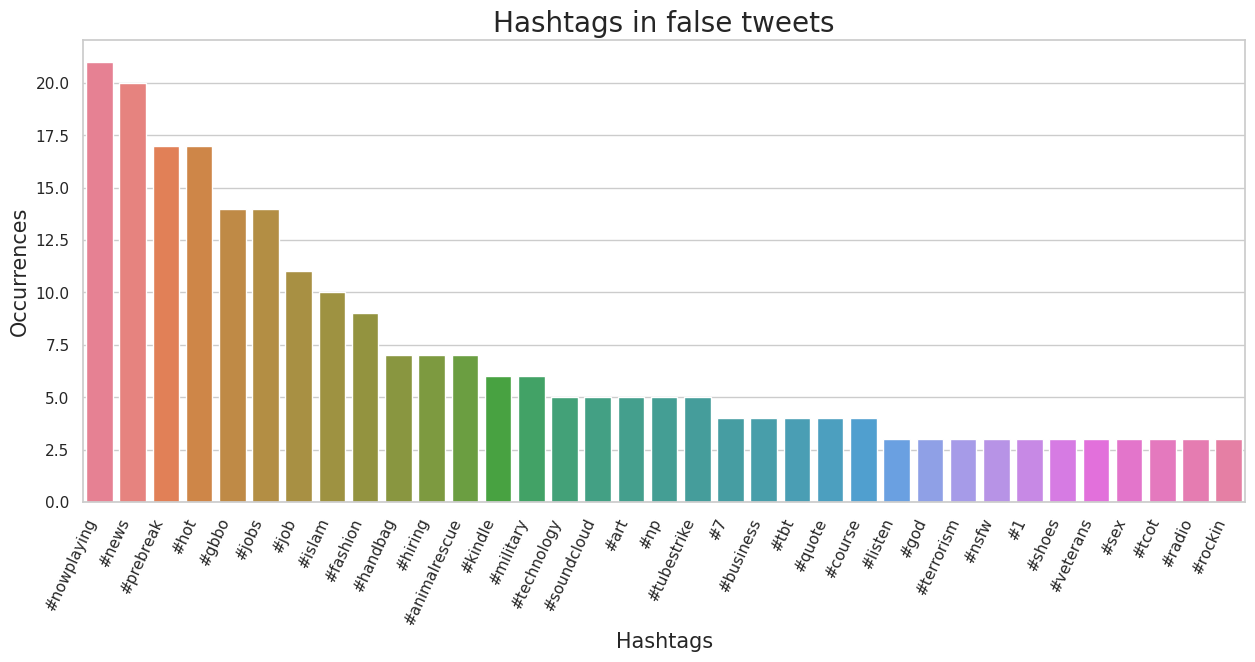

In [119]:
#Bar plot
ax = sns.barplot(x = 'hashtag', y = 'occurrence', data = DFHashtagPerFalseTweets.head(35),\
                 palette = "husl")
ax.set_xlabel('Hashtags', fontsize = 15)
ax.set_ylabel('Occurrences', fontsize = 15)
ax.set_title('Hashtags in false tweets', fontsize = 20)
plt.xticks(rotation=65, horizontalalignment='right')
ax.figure.set_size_inches(15, 6)

In [123]:
#Hashtags in real tweets:
DFHashtagPerRealTweets = hashtagPerVeracityDFMaker(1, '#')
DFHashtagPerRealTweets['occurrence'] = DFHashtagPerRealTweets['target_sum']
del DFHashtagPerRealTweets['target_sum']
DFHashtagPerRealTweets = DFHashtagPerRealTweets.sort_values(by = 'occurrence',\
                                                           ascending = False)
DFHashtagPerRealTweets.head(3)

,hashtag,occurrence
24,#news,54
82,#hiroshima,21
0,#earthquake,19


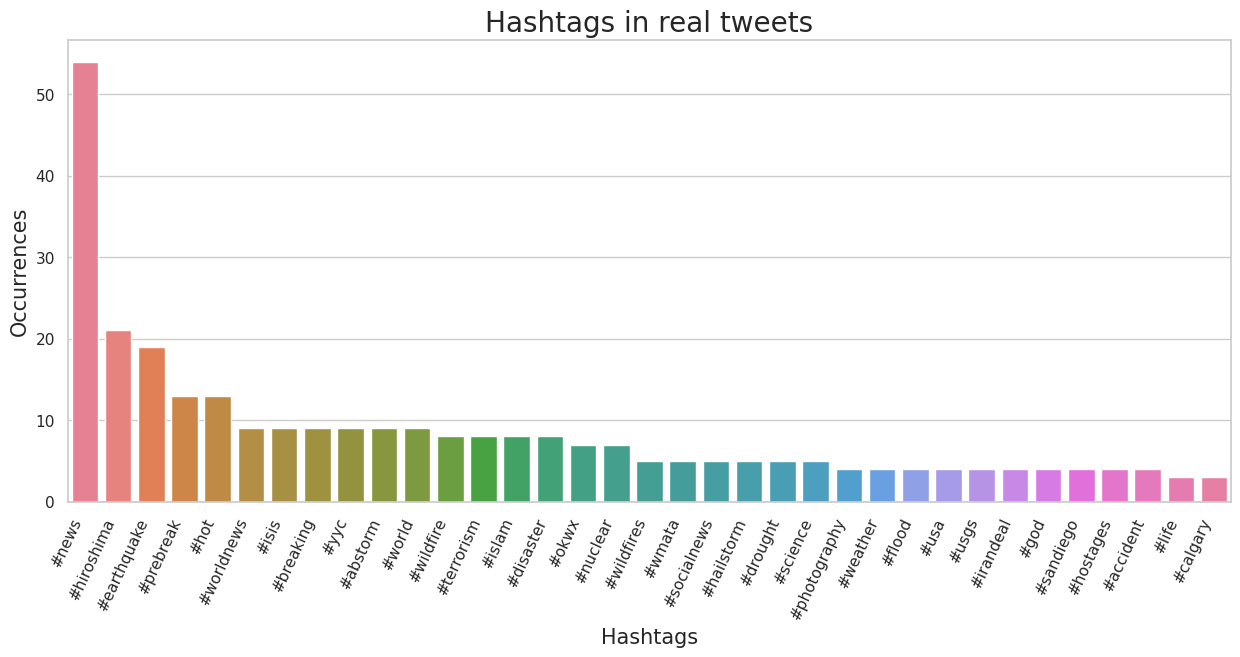

In [124]:
#Bar plot
ax = sns.barplot(x = 'hashtag', y = 'occurrence', data = DFHashtagPerRealTweets.head(35),\
                 palette = "husl")
ax.set_xlabel('Hashtags', fontsize = 15)
ax.set_ylabel('Occurrences', fontsize = 15)
ax.set_title('Hashtags in real tweets', fontsize = 20)
plt.xticks(rotation=65, horizontalalignment='right')
ax.figure.set_size_inches(15, 6)

In [125]:
#Comparison between hashtags that appear both in real and false tweets
hashtagsPerVeracity = DFHashtagPerFalseTweets.merge(DFHashtagPerRealTweets, on = 'hashtag')
hashtagsPerVeracity.head(3)

,hashtag,occurrence_x,occurrence_y
0,#news,20,54
1,#prebreak,17,13
2,#hot,17,13


In [126]:
hashtagsPerVeracity['total occurrence'] = hashtagsPerVeracity['occurrence_x'] + hashtagsPerVeracity['occurrence_y']
hashtagsPerVeracity = hashtagsPerVeracity.rename(columns = {'occurrence_y' : 'occurrence real tweets'})
del hashtagsPerVeracity['occurrence_x']
hashtagsPerVeracity = hashtagsPerVeracity.sort_values(by = 'total occurrence',\
                                                     ascending = False)

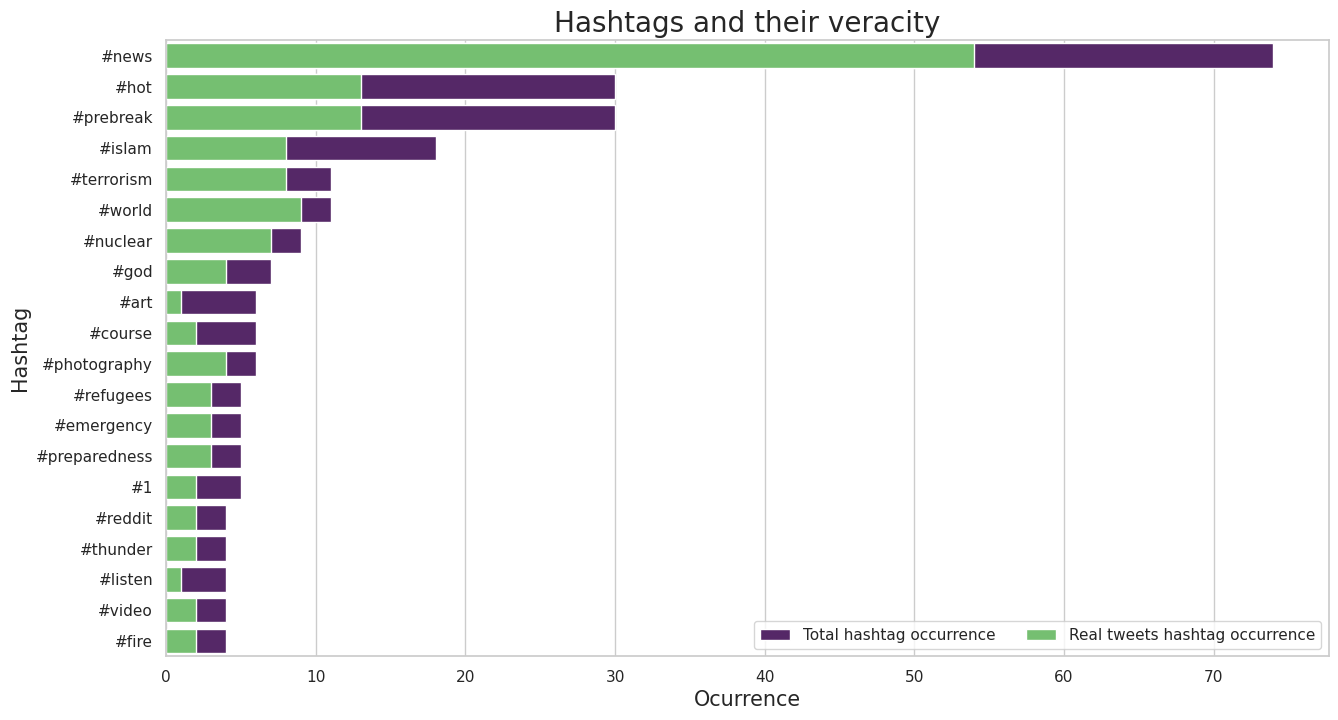

In [127]:
#Barplot
f, ax = plt.subplots(figsize = (15, 8))
sns.set_color_codes('dark')
sns.barplot(x = 'total occurrence', y = 'hashtag', data = hashtagsPerVeracity.head(20),\
            label = 'Total hashtag occurrence', color = 'm', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'occurrence real tweets', y = 'hashtag', data = hashtagsPerVeracity.head(20),
            label = 'Real tweets hashtag occurrence', color = 'g', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
ax.set_xlabel('Ocurrence', fontsize = 15)
ax.set_ylabel('Hashtag', fontsize = 15)
ax.set_title('Hashtags and their veracity', fontsize = 20)
plt.show()